In [1]:
#Load libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split

In [2]:
#Read in clean file
df_traffic = pd.read_csv("traffic_accidents.csv")
df_traffic.head()

,Unnamed: 0,ID,Severity,Description,State,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),...,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight,Year,Month
0,0,A-1,2,Accident on Tanner Rd at Pennbrooke Ln.,SC,76.0,76.0,52.0,28.91,10.0,...,0,0,0,0,Day,Day,Day,Day,2019,5
1,1,A-2,2,Accident on Houston Branch Rd at Providence Br...,NC,76.0,76.0,62.0,29.30,10.0,...,0,0,0,0,Day,Day,Day,Day,2019,10
2,2,A-3,2,Stationary traffic on CA-17 from Summit Rd (CA...,CA,51.0,51.0,80.0,30.17,10.0,...,0,0,0,0,Night,Night,Night,Night,2020,12
3,3,A-4,2,Accident on US-395 Southbound at Topsy Ln.,NV,53.6,0.0,16.0,30.16,10.0,...,0,0,1,0,Day,Day,Day,Day,2018,4
4,4,A-5,3,Accident on I-595 Westbound at Exit 4 / Pine I...,FL,84.2,0.0,84.0,29.92,10.0,...,0,0,1,0,Day,Day,Day,Day,2016,8


In [3]:
#Somehow have new column that needs to be removed
df_traffic = df_traffic.drop(columns = ['Unnamed: 0'], axis = 1)
df_traffic.head()

,ID,Severity,Description,State,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,...,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight,Year,Month
0,A-1,2,Accident on Tanner Rd at Pennbrooke Ln.,SC,76.0,76.0,52.0,28.91,10.0,N,...,0,0,0,0,Day,Day,Day,Day,2019,5
1,A-2,2,Accident on Houston Branch Rd at Providence Br...,NC,76.0,76.0,62.0,29.30,10.0,VAR,...,0,0,0,0,Day,Day,Day,Day,2019,10
2,A-3,2,Stationary traffic on CA-17 from Summit Rd (CA...,CA,51.0,51.0,80.0,30.17,10.0,W,...,0,0,0,0,Night,Night,Night,Night,2020,12
3,A-4,2,Accident on US-395 Southbound at Topsy Ln.,NV,53.6,0.0,16.0,30.16,10.0,SSW,...,0,0,1,0,Day,Day,Day,Day,2018,4
4,A-5,3,Accident on I-595 Westbound at Exit 4 / Pine I...,FL,84.2,0.0,84.0,29.92,10.0,SSE,...,0,0,1,0,Day,Day,Day,Day,2016,8


```
This project objective has changed a bit and I plan on looking at severity more than trying to predict anything. Most likely the state with the highest accident rate here will remain fairly consistent in the next several years. Also population plays a huge role from what I've seen so far since California ranks high in several variables. Next I am going to look at the correlation between severity and the other major variables.
```

### Correlation between severity and weather

In [4]:
temp_corr = df_traffic.corr()['Severity']['Temperature(F)']
wc_corr = df_traffic.corr()['Severity']['Wind_Chill(F)']
hum_corr = df_traffic.corr()['Severity']['Humidity(%)']
press_corr = df_traffic.corr()['Severity']['Pressure(in)']
vis_corr = df_traffic.corr()['Severity']['Visibility(mi)']
ws_corr = df_traffic.corr()['Severity']['Wind_Speed(mph)']
pre_corr = df_traffic.corr()['Severity']['Precipitation(in)']

In [5]:
print('Correlation between Severity and Temperature is:{} '.format(temp_corr))
print('Correlation between Severity and Wind Chill is:{} '.format(wc_corr))
print('Correlation between Severity and Humidity is:{} '.format(hum_corr))
print('Correlation between Severity and Pressure is:{} '.format(press_corr))
print('Correlation between Severity and Visibility is:{} '.format(vis_corr))
print('Correlation between Severity and Wind Speed is:{} '.format(ws_corr))
print('Correlation between Severity and Precipitation is:{} '.format(pre_corr))

Correlation between Severity and Temperature is:-0.0034544054891396084 
Correlation between Severity and Wind Chill is:-0.14122528099238865 
Correlation between Severity and Humidity is:0.025640965170424763 
Correlation between Severity and Pressure is:0.010993350029331508 
Correlation between Severity and Visibility is:-0.00546818314957804 
Correlation between Severity and Wind Speed is:0.023737687105423472 
Correlation between Severity and Precipitation is:0.00842662419245399 


### Correlation between severity and obstacle

In [6]:
amen_corr = df_traffic.corr()['Severity']['Amenity']
bump_corr = df_traffic.corr()['Severity']['Bump']
cross_corr = df_traffic.corr()['Severity']['Crossing']
gw_corr = df_traffic.corr()['Severity']['Give_Way']
jun_corr = df_traffic.corr()['Severity']['Junction']
ne_corr = df_traffic.corr()['Severity']['No_Exit']
rail_corr = df_traffic.corr()['Severity']['Railway']
round_corr = df_traffic.corr()['Severity']['Roundabout']
stat_corr = df_traffic.corr()['Severity']['Station']
stop_corr = df_traffic.corr()['Severity']['Stop']
tc_corr = df_traffic.corr()['Severity']['Traffic_Calming']
ts_corr = df_traffic.corr()['Severity']['Traffic_Signal']
tl_corr = df_traffic.corr()['Severity']['Turning_Loop']

In [7]:
print('Correlation between Severity and Amenity is: {}'.format(amen_corr))
print('Correlation between Severity and Bump is: {}'.format(bump_corr))
print('Correlation between Severity and Crossing is: {}'.format(cross_corr))
print('Correlation between Severity and Give Way is: {}'.format(gw_corr))
print('Correlation between Severity and Junction is: {}'.format(jun_corr))
print('Correlation between Severity and No Exit is: {}'.format(ne_corr))
print('Correlation between Severity and Railway is: {}'.format(rail_corr))
print('Correlation between Severity and Roundabout is: {}'.format(round_corr))
print('Correlation between Severity and Station is: {}'.format(stat_corr))
print('Correlation between Severity and Stop is: {}'.format(stop_corr))
print('Correlation between Severity and Traffic Calming is: {}'.format(tc_corr))
print('Correlation between Severity and Traffic Signal is: {}'.format(ts_corr))
print('Correlation between Severity and Turning Loop is: {}'.format(tl_corr))

Correlation between Severity and Amenity is: -0.02806534929850468
Correlation between Severity and Bump is: -0.0028650940159805354
Correlation between Severity and Crossing is: -0.10744069061971985
Correlation between Severity and Give Way is: -0.002778838346645338
Correlation between Severity and Junction is: 0.03864835799706985
Correlation between Severity and No Exit is: -0.005160069482440962
Correlation between Severity and Railway is: -0.01464403110421576
Correlation between Severity and Roundabout is: -0.0028413521677066026
Correlation between Severity and Station is: -0.035492477958530735
Correlation between Severity and Stop is: -0.036644570040087886
Correlation between Severity and Traffic Calming is: -0.0010619469745804249
Correlation between Severity and Traffic Signal is: -0.1325533709997848
Correlation between Severity and Turning Loop is: nan


```
Looking through the different correlations nothing is super strong. From what I've found anything that is either positive 0 to 0.3 or negative 0 to -0.3 are weak trends in either the positive or negative direction.
```

### Modeling the data

In [8]:
#Going to create a subset for ID, Severity, and the obstacles. This is because weather all have unique numeric values
#that most likely won't work well within a model.
sub_traffic = df_traffic.drop(columns = {'Description','State','Temperature(F)', 'Wind_Chill(F)', 'Humidity(%)', 'Pressure(in)',
                                        'Visibility(mi)', 'Wind_Direction','Wind_Speed(mph)', 'Precipitation(in)',
                                         'Weather_Condition','Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
                                        'Astronomical_Twilight'}, axis = 1)
#verify the dataframe looks as expected
sub_traffic.head()

,ID,Severity,Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Year,Month
0,A-1,2,0,0,0,0,0,0,0,0,0,0,0,0,0,2019,5
1,A-2,2,0,0,0,0,0,0,0,0,0,0,0,0,0,2019,10
2,A-3,2,0,0,0,0,0,0,0,0,0,0,0,0,0,2020,12
3,A-4,2,0,0,0,0,0,0,0,0,0,0,0,1,0,2018,4
4,A-5,3,0,0,0,0,1,0,0,0,0,0,0,1,0,2016,8


In [9]:
#Need to remove the letters from ID
new = sub_traffic["ID"].str.split("-", n = 1, expand = True)
sub_traffic["ID_Letter"] = new[0]
sub_traffic["ID_Number"] = new[1]
sub_traffic.drop(columns =["ID", "ID_Letter"], inplace = True)

#verify changes
sub_traffic.head()

,Severity,Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Year,Month,ID_Number
0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,2019,5,1
1,2,0,0,0,0,0,0,0,0,0,0,0,0,0,2019,10,2
2,2,0,0,0,0,0,0,0,0,0,0,0,0,0,2020,12,3
3,2,0,0,0,0,0,0,0,0,0,0,0,1,0,2018,4,4
4,3,0,0,0,0,1,0,0,0,0,0,0,1,0,2016,8,5


In [56]:
#define target variable
y = sub_traffic.Severity

#create train and test following the 80/20 rule
X_train, X_test, y_train, y_test = train_test_split(sub_traffic, y, test_size = 0.2)

#verify split
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(2325288, 17)
(581322, 17)
(2325288,)
(581322,)


In [37]:
#load in libraries for algorithms
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import GaussianNB
from sklearn import tree

In [12]:
#stochastic gradient descent (SGD)
sgd = linear_model.SGDClassifier(max_iter=5, tol=None)
sgd.fit(X_train, y_train)
Y_pred = sgd.predict(X_test)
sgd.score(X_train, y_train)
acc_sgd = round(sgd.score(X_train, y_train) * 100, 2)

In [13]:
#random forest
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, y_train)
y_prediction = random_forest.predict(X_test)
random_forest.score(X_train, y_train)
acc_random_forest = round(random_forest.score(X_train, y_train) * 100, 2)

In [14]:
#logistic regression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
Y_pred = logreg.predict(X_test)
acc_log = round(logreg.score(X_train, y_train) * 100, 2)

In [15]:
#k nearest neighbor
knn = KNeighborsClassifier(n_neighbors = 3) 
knn.fit(X_train, y_train)  
Y_pred = knn.predict(X_test)  
acc_knn = round(knn.score(X_train, y_train) * 100, 2)

In [16]:
#gaussian naive bayes
gaussian = GaussianNB() 
gaussian.fit(X_train, y_train)  
Y_pred = gaussian.predict(X_test)  
acc_gaussian = round(gaussian.score(X_train, y_train) * 100, 2)

In [17]:
#perceptron
perceptron = Perceptron(max_iter=100)
perceptron.fit(X_train, y_train)
Y_pred = perceptron.predict(X_test)
acc_perceptron = round(perceptron.score(X_train, y_train) * 100, 2)

In [ ]:
#linear support vector machine
linear_svc = LinearSVC()
linear_svc.fit(X_train, y_train)
Y_pred = linear_svc.predict(X_test)
acc_linear_svc = round(linear_svc.score(X_train, y_train) * 100, 2)

In [ ]:
#decision tree
decision_tree = DecisionTreeClassifier() 
decision_tree.fit(X_train, y_train)  
Y_pred = decision_tree.predict(X_test)  
acc_decision_tree = round(decision_tree.score(X_train, y_train) * 100, 2)

In [21]:
#looking at the best models
results = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression', 
              'Random Forest', 'Naive Bayes', 'Perceptron', 
              'Stochastic Gradient Decent', 
              'Decision Tree'],
    'Score': [acc_linear_svc, acc_knn, acc_log, 
              acc_random_forest, acc_gaussian, acc_perceptron, 
              acc_sgd, acc_decision_tree]})
result_df = results.sort_values(by='Score', ascending=False)
result_df = result_df.set_index('Score')
result_df.head(9)

,Model
Score,
100.00,Random Forest
100.00,Decision Tree
79.81,KNN
73.26,Logistic Regression
73.26,Naive Bayes
73.26,Perceptron
73.26,Stochastic Gradient Decent
71.94,Support Vector Machines


```
I used this website https://towardsdatascience.com/predicting-the-survival-of-titanic-passengers-30870ccc7e8 to help go through each algorithm type and score it. I also did this as part of DSC550 for my project. I am not sure I believe Random Forest and Decision Tree should score as 100% as anything that scores that high in modeling makes me suspicious that I did something wrong. I will try to move forward with Random Forest as this page does. I'll first look at feature importance.
```

In [27]:
#The example I'm following mentioned measuring the feature importance
importances = pd.DataFrame({'feature':X_train.columns,'importance':np.round(random_forest.feature_importances_,3)})
importances = importances.sort_values('importance',ascending=False).set_index('feature')
importances.head(20)

,importance
feature,
Severity,0.969
Year,0.012
Month,0.008
Traffic_Signal,0.006
Crossing,0.003
Stop,0.001
Station,0.000
Turning_Loop,0.000
Traffic_Calming,0.000


In [33]:
#Want to look at the totals of each columns for everything but 0's. 
sub_traffic.astype(bool).sum(axis=0)

Severity           2906610
Amenity              31370
Bump                   579
Crossing            218929
Give_Way              8220
Junction            276077
No_Exit               3858
Railway              25927
Roundabout             142
Station              57910
Stop                 45454
Traffic_Calming       1307
Traffic_Signal      453665
Turning_Loop             0
Year               2906610
Month              2906610
ID_Number          2906610
dtype: int64

```
Feature importance didn't really give me much as everything was pretty much 0 but Severity, Year, and Month. Decided to look at the distinct values in each column to get an idea of what might be worth looking into more. Looks like I can completely remove Turning_Loop as no accidents were reported with that type of obstacle. It would be interesting to see the obstacle counts by each level of severity, so I'm going to go add that to PowerBi to see how it all shapes up. Also going to look at severity using it as a grouping.
```

In [36]:
#Look at severity totals by level
severity = sub_traffic.groupby("Severity")["ID_Number"].count()
severity

Severity
1      28751
2    2129263
3     629452
4     119144
Name: ID_Number, dtype: int64

```
Going to move forward with decision tree even with my suspicions of the 100%. I chatted with another classmate and we both agreed while nothing is 100% in this area of study it does make sense to go this route. I'm using https://scikit-learn.org/stable/auto_examples/tree/plot_unveil_tree_structure.html#sphx-glr-auto-examples-tree-plot-unveil-tree-structure-py as my reference and guide as I've only done a couple of decision trees previous to this project.
```

In [61]:
#Train tree classifier
clf = DecisionTreeClassifier(max_leaf_nodes = 10, random_state = 0)
clf.fit(X_train, y_train)

DecisionTreeClassifier(max_leaf_nodes=10, random_state=0)

In [62]:
#Tree structure
n_nodes = clf.tree_.node_count
children_left = clf.tree_.children_left
children_right = clf.tree_.children_right
feature = clf.tree_.feature
threshold = clf.tree_.threshold

node_depth = np.zeros(shape=n_nodes, dtype=np.int64)
is_leaves = np.zeros(shape=n_nodes, dtype=bool)
stack = [(0, 0)]  # start with the root node id (0) and its depth (0)
while len(stack) > 0:
    # `pop` ensures each node is only visited once
    node_id, depth = stack.pop()
    node_depth[node_id] = depth

    # If the left and right child of a node is not the same we have a split
    # node
    is_split_node = children_left[node_id] != children_right[node_id]
    # If a split node, append left and right children and depth to `stack`
    # so we can loop through them
    if is_split_node:
        stack.append((children_left[node_id], depth + 1))
        stack.append((children_right[node_id], depth + 1))
    else:
        is_leaves[node_id] = True

print("The binary tree structure has {n} nodes and has "
      "the following tree structure:\n".format(n=n_nodes))
for i in range(n_nodes):
    if is_leaves[i]:
        print("{space}node={node} is a leaf node.".format(
            space=node_depth[i] * "\t", node=i))
    else:
        print("{space}node={node} is a split node: "
              "go to node {left} if X[:, {feature}] <= {threshold} "
              "else to node {right}.".format(
                  space=node_depth[i] * "\t",
                  node=i,
                  left=children_left[i],
                  feature=feature[i],
                  threshold=threshold[i],
                  right=children_right[i]))

The binary tree structure has 7 nodes and has the following tree structure:

node=0 is a split node: go to node 1 if X[:, 0] <= 2.5 else to node 2.
	node=1 is a split node: go to node 5 if X[:, 0] <= 1.5 else to node 6.
	node=2 is a split node: go to node 3 if X[:, 0] <= 3.5 else to node 4.
		node=3 is a leaf node.
		node=4 is a leaf node.
		node=5 is a leaf node.
		node=6 is a leaf node.


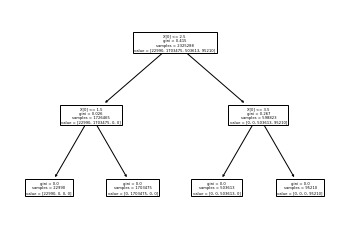

In [63]:
#Adding this example for clarity
tree.plot_tree(clf)
plt.show()

In [64]:
#Decision path
node_indicator = clf.decision_path(X_test)
leaf_id = clf.apply(X_test)

sample_id = 0
# obtain ids of the nodes `sample_id` goes through, i.e., row `sample_id`
node_index = node_indicator.indices[node_indicator.indptr[sample_id]:
                                    node_indicator.indptr[sample_id + 1]]

print('Rules used to predict sample {id}:\n'.format(id=sample_id))
for node_id in node_index:
    # continue to the next node if it is a leaf node
    if leaf_id[sample_id] == node_id:
        continue

    # check if value of the split feature for sample 0 is below threshold
    if (X_test[sample_id, feature[node_id]] <= threshold[node_id]):
        threshold_sign = "<="
    else:
        threshold_sign = ">"

    print("decision node {node} : (X_test[{sample}, {feature}] = {value}) "
          "{inequality} {threshold})".format(
              node=node_id,
              sample=sample_id,
              feature=feature[node_id],
              value=X_test[sample_id, feature[node_id]],
              inequality=threshold_sign,
              threshold=threshold[node_id]))

Rules used to predict sample 0:



KeyError: (0, 0)

In [67]:
#Parameters
clf.get_params(deep=True)

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': 10,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'presort': 'deprecated',
 'random_state': 0,
 'splitter': 'best'}

In [71]:
clf.score(X, y, sample_weight = None)

1.0

```
Reflection on decision tree. I couldn't complete the decision path as I keep getting an error and I'm not sure if it's me or the code or my data. I'm also wondering if it just doesn't work well with my data since I have 0 or 1 and that's it. I used Severity as my target variable, which is the outcome of my post in the class chat. I did some visuals on this so I may stick to that in the presentation. Overall, if I had more time I would continue working through this but I need to wrap up. I will probably come back to this later on and potentially try something else or redo altogether.
```